In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13,5

In [3]:
sales = pd.read_excel('proxima_sales.xls')
sales.columns=['year', 'month', 'brand', 'company', 'ATC1', 'ATC2', 'ATC3', 'ATC4', 'ATC5', 'sku', 'packs', 'rur', 'price']
sales['packs'] = sales.packs.astype('int64')
sales['rur'] = sales.rur.astype('int64')
sales

,year,month,brand,company,ATC1,ATC2,ATC3,ATC4,ATC5,sku,packs,rur,price
0,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",6781,1101454,162.410443
1,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",10437,964720,92.426297
2,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",458,80092,174.804749
3,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",22,36330,1583.006972
4,2016,1,АПРОТЕКС,"Верофарм (Россия, Москва)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A B Ингибиторы протеиназ,B02A B01 Апротинин,"АПРОТЕКС, Верофарм (Россия, Москва), лиофил. д...",29,12838,433.748986
5,2016,1,АПРОТЕКС,"Верофарм (Россия, Москва)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A B Ингибиторы протеиназ,B02A B01 Апротинин,"АПРОТЕКС, Верофарм (Россия, Москва), лиофил. д...",285,112789,395.613785
6,2016,1,АПРОТЕКС,"Верофарм (Россия, Москва)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A B Ингибиторы протеиназ,B02A B01 Апротинин,"АПРОТЕКС, Верофарм (Россия, Москва), р-р д/инф...",1316,396796,301.375378
7,2016,1,АМИНОКАПРОНОВАЯ КИСЛОТА,Биохимик (Россия),"B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A A Аминокислоты,B02A A01 Кислота аминокапроновая,"АМИНОКАПРОНОВАЯ КИСЛОТА, Биохимик (Россия), р-...",63,174201,2751.997946
8,2016,1,АМИНОКАПРОНОВАЯ КИСЛОТА,Биохимик (Россия),"B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A A Аминокислоты,B02A A01 Кислота аминокапроновая,"АМИНОКАПРОНОВАЯ КИСЛОТА, Биохимик (Россия), р-...",7,460,63.814404
9,2016,1,АМИНОКАПРОНОВАЯ КИСЛОТА,Биохимик (Россия),"B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A A Аминокислоты,B02A A01 Кислота аминокапроновая,"АМИНОКАПРОНОВАЯ КИСЛОТА, Биохимик (Россия), р-...",5120,273092,53.331390


In [4]:
sales_atc2 = sales.filter(items = ['year', 'ATC2', 'packs', 'rur'])
sales_atc2_barh = sales_atc2.groupby('ATC2').sum().sort_values('rur', ascending=True).reset_index()
sales_atc2_barh

,ATC2,year,packs,rur
0,B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,14334048,28888414,6712533837
1,B05 КРОВЕЗАМЕНИТЕЛИ И ПЕРФУЗИОННЫЕ РАСТВОРЫ,57588027,142749653,7830014340
2,B06 ПРОЧИЕ ГЕМАТОЛОГИЧЕСКИЕ СРЕДСТВА,1609938,22672924,19310525909
3,B03 АНТИАНЕМИЧЕСКИЕ СРЕДСТВА,9397467,149414352,20180542520
4,B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА,18277054,219802381,92952838632


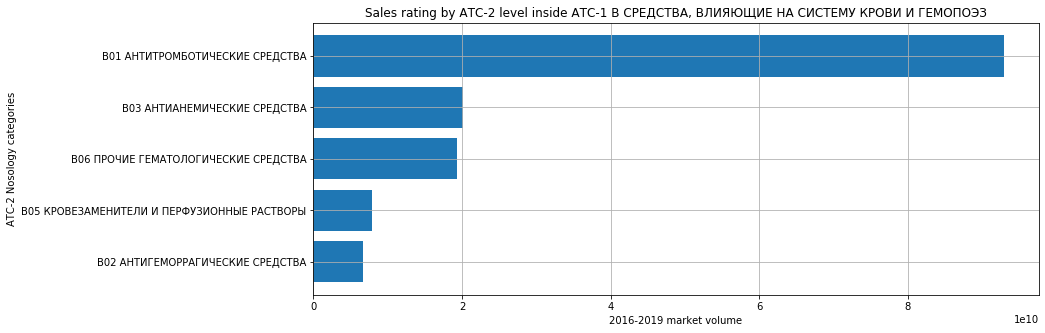

In [5]:
plt.barh(sales_atc2_barh['ATC2'], sales_atc2_barh['rur'])
plt.xlabel('2016-2019 market volume')
plt.ylabel('ATC-2 Nosology categories')
plt.title('Sales rating by ATC-2 level inside ATC-1 B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ')
plt.grid()

In [6]:
dynamic_sales = sales.groupby(['year','month', 'ATC2']).sum()
dynamic_sales = dynamic_sales.filter(items=['year', 'ATC2', 'rur'])
dynamic_sales.head()

rur
year month ATC2                                                   
2016 1     B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА              1432274087
           B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА              116257500
           B03 АНТИАНЕМИЧЕСКИЕ СРЕДСТВА                  324323426
           B05 КРОВЕЗАМЕНИТЕЛИ И ПЕРФУЗИОННЫЕ РАСТВОРЫ   146008189
           B06 ПРОЧИЕ ГЕМАТОЛОГИЧЕСКИЕ СРЕДСТВА          347629020

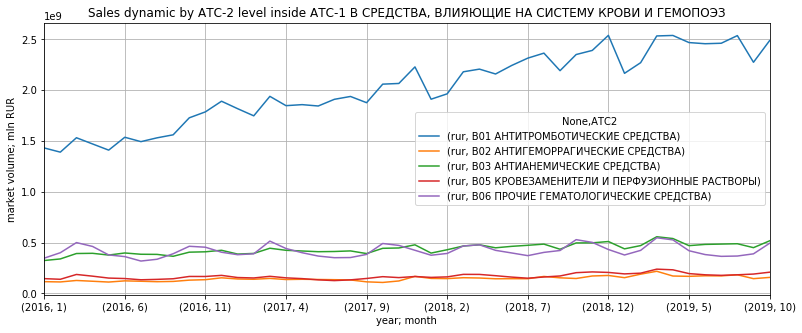

In [7]:
dynamic_sales.unstack('ATC2').plot()
plt.xlabel('year; month')
plt.ylabel('market volume; mln RUR')
plt.title('Sales dynamic by ATC-2 level inside ATC-1 B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ')
plt.grid()

In [8]:
B01_dynamic_sales_by_brands = sales[ (sales['ATC2']=='B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА') ]
B01_dynamic_sales_by_brands = B01_dynamic_sales_by_brands.groupby(['brand']).sum().sort_values('rur', ascending=False).head(5)
# B01_dynamic_sales_by_brands.groupby(['brand']).sum()
B01_dynamic_sales_by_brands

,year,month,packs,rur,price
brand,,,,,
КСАРЕЛТО,1121726,3472,5936818,19048773936,2.287660e+06
КАРДИОМАГНИЛ,371208,1156,81396484,18579037951,4.353365e+04
ПРАДАКСА,829152,2577,3174050,9401116288,1.312558e+06
ЭЛИКВИС,371208,1156,4473541,8377342871,3.094230e+05
ТРОМБО АСС,556812,1734,53683841,4553202960,2.421513e+04


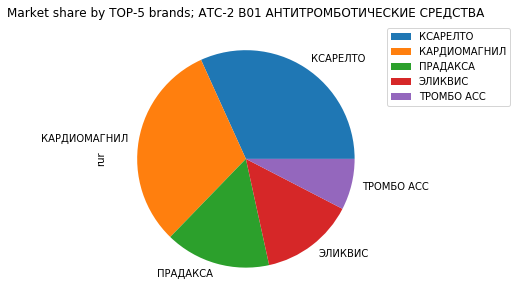

In [9]:
B01_dynamic_sales_by_brands.plot(kind='pie', y='rur')
plt.title('Market share by TOP-5 brands; ATC-2 B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА')
plt.legend(bbox_to_anchor=(1,1))

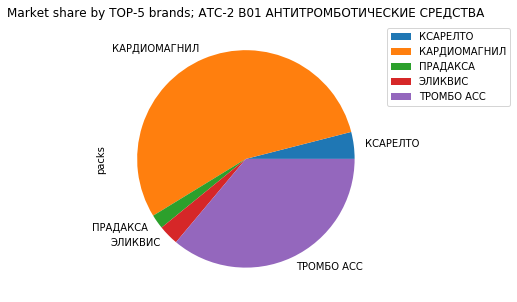

In [10]:
B01_dynamic_sales_by_brands.plot(kind='pie', y='packs')
plt.title('Market share by TOP-5 brands; ATC-2 B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА')
plt.legend(bbox_to_anchor=(1, 1))

In [11]:
brands_analysis = sales[ (sales['ATC2']=='B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА') ]
brands_analysis = brands_analysis.filter(items=['brand', 'sku'])
brands_analysis = brands_analysis.groupby(['brand', 'sku']).count().reset_index()
brands_analysis = brands_analysis.groupby('brand').count()
brands_analysis.head()

,sku
brand,
АГРЕГАЛЬ,1
АГРЕНОКС,2
АДУЦИЛ,2
АКТИЛИЗЕ,1
АНГИОКС,1


In [12]:
brands_analysis2 = sales[ (sales['ATC2']=='B03 АНТИАНЕМИЧЕСКИЕ СРЕДСТВА') ]
brands_analysis2 = brands_analysis2.filter(items=['brand', 'sku'])
brands_analysis2 = brands_analysis2.groupby(['brand', 'sku']).count().reset_index()
brands_analysis2 = brands_analysis2.groupby('brand').count()
# brands_analysis2.sort_values(by='sku', ascending=False).head()

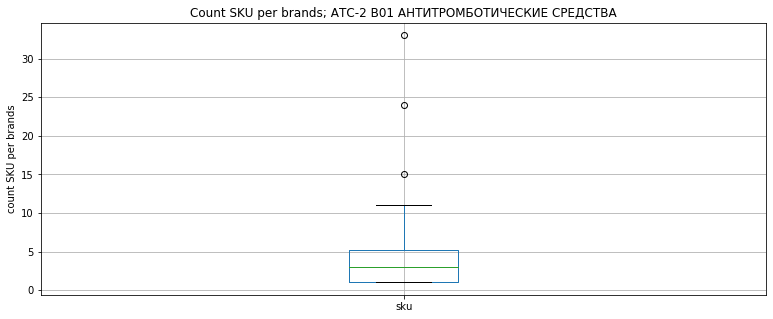

In [13]:
brands_analysis['sku'].plot(kind='box')
plt.ylabel('count SKU per brands')
plt.title('Count SKU per brands; ATC-2 B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА')
plt.grid()
# brands_analysis2['sku'].plot(kind='box')
# plt.ylabel('count SKU per brands')
# # plt.xlabel('market volume; mln RUR')
# plt.title('Count SKU per brands; ATC-2 B03 АНТИАНЕМИЧЕСКИЕ СРЕДСТВА')
# plt.grid()

In [21]:
import seaborn as sns
mcv = pd.read_excel('market cross view.xls')
mcv.columns=['Brand_Company', 'Sales', 'Promo_doctors', 'Promo_pharmacists', 'TV_Advertising_rur', 
             'Prescriptions_pcs', 'Price_rur', 'Distribution_index']
mcv['Sales'] = mcv.Sales.astype('int64')
mcv['Promo_doctors'] = mcv.Promo_doctors.astype('int64')
mcv['Promo_pharmacists'] = mcv.Promo_pharmacists.astype('int64')
mcv['TV_Advertising_rur'] = mcv.TV_Advertising_rur.astype('int64')
mcv['Prescriptions_pcs'] = mcv.Prescriptions_pcs.astype('int64')
mcv['Price_rur'] = mcv.Price_rur.astype('float')
mcv['Distribution_index'] = mcv.Distribution_index.astype('float')
mcv

,Brand_Company,Sales,Promo_doctors,Promo_pharmacists,TV_Advertising_rur,Prescriptions_pcs,Price_rur,Distribution_index
0,ИНГАВИРИН Валента Фармацевтика (Россия),7679920463,86188,41990,4183481,21023496,510.212016,94.281456
1,ДЕТРАЛЕКС Сервье (Франция),7409893624,286244,41946,1693923297,8091227,1384.451147,66.518474
2,МИРАМИСТИН Инфамед (Россия),7391969484,34838,14429,2020471734,19431151,361.278492,90.662160
3,КАГОЦЕЛ Центр медицинский НИАРМЕДИК(филиал) (Р...,6766966317,47209,47681,2466235609,7702405,267.909864,96.436985
4,ТЕРАФЛЮ ГлаксоСмитКляйн (Великобритания),6344067477,524,176649,2805567713,1025588,326.828626,79.198606
5,ЭССЕНЦИАЛЕ Санофи (Франция),5090678896,15224,4835,4159001771,1212650,1125.089168,72.524875
6,КАРДИОМАГНИЛ Такеда (Япония),5011285928,80759,6740,1623910724,22082456,230.877195,89.474751
7,ПЕНТАЛГИН ОТИСИФАРМ (Россия),4964573636,2186,12768,3734106257,151608,161.570534,92.018159
8,ЛИНЕКС Сандоз (Швейцария),4852301286,97133,47996,4122754484,8540079,480.233030,74.918924
9,СТРЕПСИЛС Реккит Бенкизер (Великобритания),4529067747,27227,50990,1976172025,3503623,240.784242,70.710785


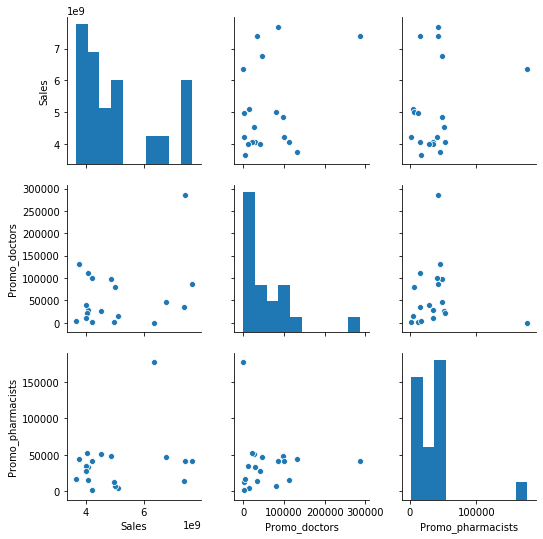

In [15]:
sns_plot = sns.pairplot(
    mcv[['Sales', 'Promo_doctors', 'Promo_pharmacists']])
sns_plot

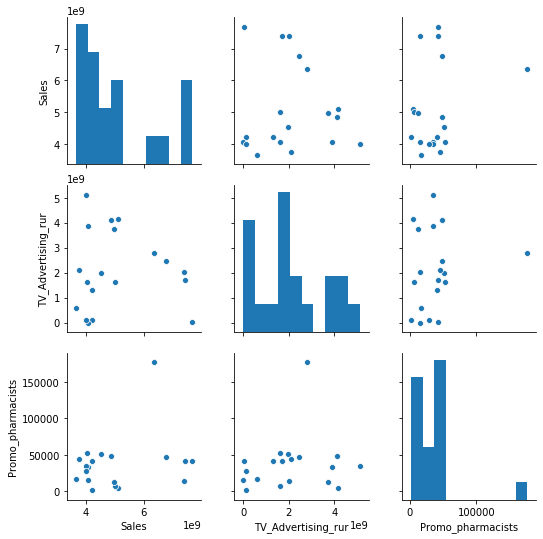

In [16]:
sns_plot = sns.pairplot(
    mcv[['Sales', 'TV_Advertising_rur', 'Promo_pharmacists']])
sns_plot

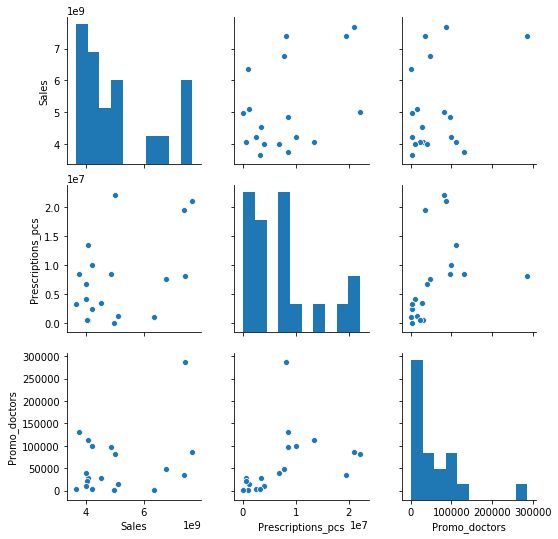

In [17]:
sns_plot = sns.pairplot(
    mcv[['Sales', 'Prescriptions_pcs', 'Promo_doctors']])
sns_plot

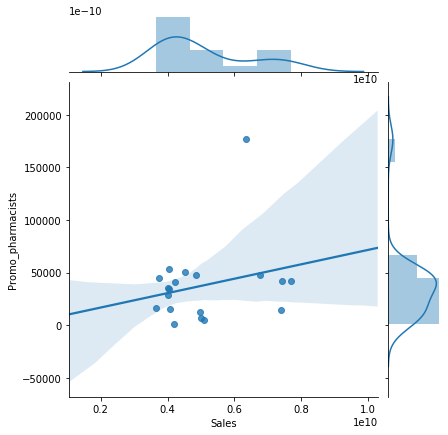

In [18]:
sns.jointplot(x='Sales', y='Promo_pharmacists', 
              data=mcv, kind='reg')

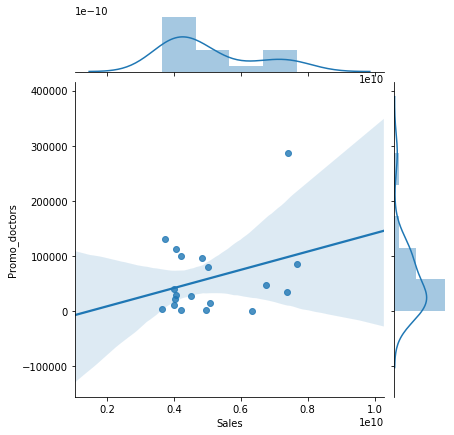

In [19]:
sns.jointplot(x='Sales', y='Promo_doctors', 
              data=mcv, kind='reg')

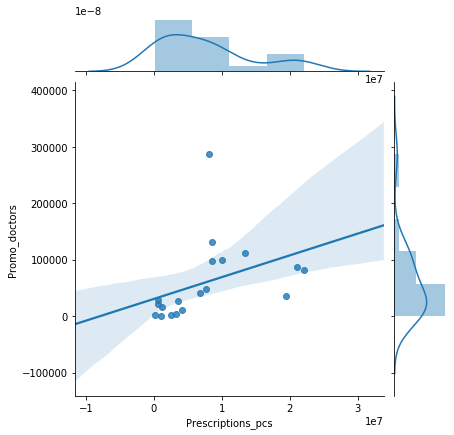

In [20]:
sns.jointplot(x='Prescriptions_pcs', y='Promo_doctors', 
              data=mcv, kind='reg')

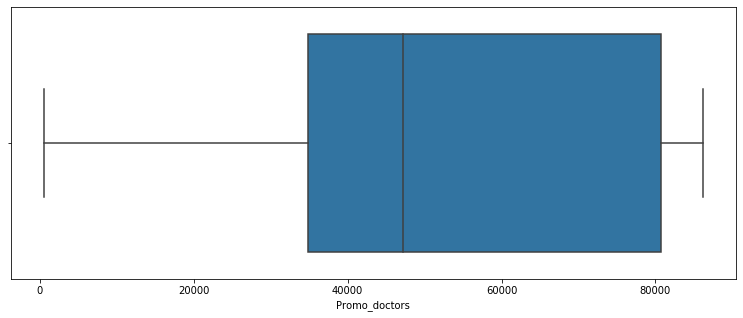

In [25]:
top_platforms = mcv.Brand_Company.value_counts().sort_values(ascending = False).head(5).index.values
top_platforms
ax = sns.boxplot(x="Promo_doctors", 
            data=mcv[mcv.Brand_Company.isin(top_platforms)])

In [38]:
viagra_competitors_sales = pd.read_excel('viagra_and_competitors.xls')
viagra_competitors_sales = viagra_competitors_sales.drop(0)
viagra_competitors_sales.columns=['year', 'month', 'federal district', 'brand', 'packs', 'rur', 'price']
viagra_competitors_sales.head()

,year,month,federal district,brand,packs,rur,price
1,2019.0,1.0,Дальневосточный федеральный округ,ВИАГРА,0.009670,17.339740,1793.183097
2,2019.0,1.0,Дальневосточный федеральный округ,ЗИДЕНА,0.000103,0.142582,1386.172954
3,2019.0,1.0,Дальневосточный федеральный округ,ЛЕВИТРА,0.000212,0.513085,2418.614924
4,2019.0,1.0,Дальневосточный федеральный округ,СИАЛИС,0.003513,10.033503,2855.903454
5,2019.0,1.0,Москва,ВИАГРА,0.023133,41.819091,1807.738802


In [41]:
viagra_competitors_sales_by_regions = viagra_competitors_sales.pivot_table(
                        index='federal district', 
                        columns='brand', 
                        values='rur', 
                        aggfunc=sum).fillna(0).applymap(float)

viagra_competitors_sales_by_regions

brand,ВИАГРА,ЗИДЕНА,ЛЕВИТРА,СИАЛИС
federal district,,,,
Дальневосточный федеральный округ,172.360064,1.220547,4.166848,101.641972
Москва,471.971324,11.590692,24.461038,719.535123
Приволжский федеральный округ,228.529652,5.533612,6.438469,157.652024
Санкт-Петербург,133.452254,1.746085,2.467521,149.884068
Северо-Западный федеральный округ,102.826882,0.623888,2.920347,64.451265
Северо-Кавказский федеральный округ,49.899431,0.966694,2.620488,65.094302
Сибирский федеральный округ,221.063326,3.439746,3.371711,148.577400
Уральский федеральный округ,151.059286,1.598437,4.480407,93.151880
Центральный федеральный округ,425.795051,6.465464,13.039168,381.904210


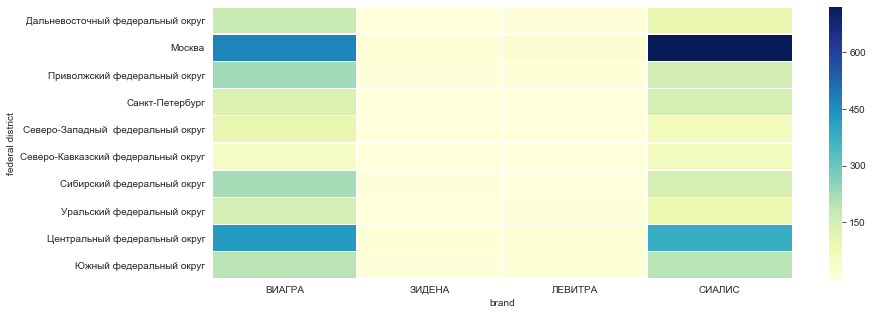

In [64]:
sns.heatmap(viagra_competitors_sales_by_regions, linewidths=0.5, cmap="YlGnBu")